In [1]:
pip install matplotlib seaborn numpy


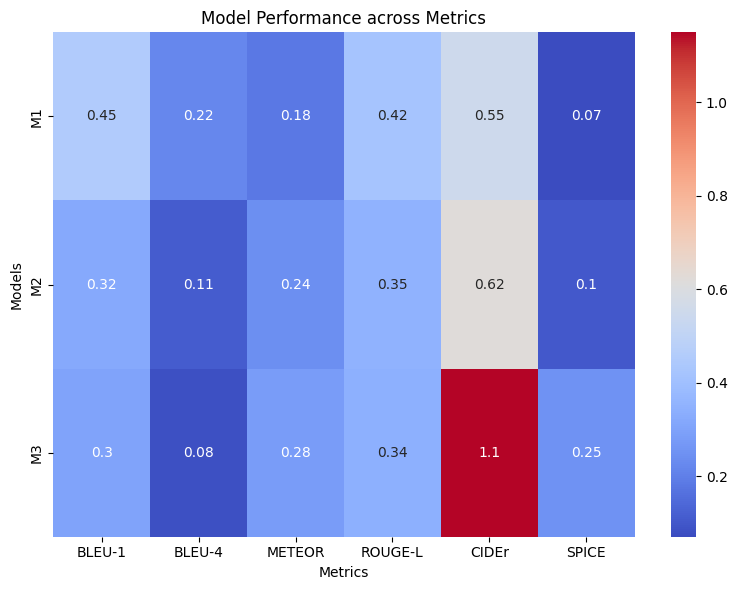

In [5]:
# import pandas as pd
# import numpy as np
# import json
# from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
# from nltk.translate.meteor_score import meteor_score
# from rouge_score import rouge_scorer
# from pycocotools.coco import COCO
# from pycocoevalcap.eval import COCOEvalCap

# # -------------------------------
# # Load CSV
# # -------------------------------
# df = pd.read_csv("image_reference.csv")

# models = {
#     "M1": "M1_caption",
#     "M2": "M2_caption",
#     "M3": "M3_caption"
# }

# smooth = SmoothingFunction().method4
# rouge = rouge_scorer.RougeScorer(["rougeL"], use_stemmer=True)

# # -------------------------------
# # PART 1: BLEU / METEOR / ROUGE
# # -------------------------------
# final_results = {}

# for model, col in models.items():
#     bleu1, bleu4, meteor, rouge_l = [], [], [], []

#     for _, row in df.iterrows():
#         refs = [r.strip().lower().split()
#                 for r in row["reference_caption"].split("||")]
#         cand = row[col].lower().split()

#         # BLEU
#         bleu1.append(sentence_bleu(
#             refs, cand, weights=(1,0,0,0), smoothing_function=smooth))
#         bleu4.append(sentence_bleu(
#             refs, cand, weights=(0.25,0.25,0.25,0.25), smoothing_function=smooth))

#         # METEOR
#         meteor.append(meteor_score(
#             [" ".join(r) for r in refs], row[col].lower()))

#         # ROUGE-L
#         rouge_l.append(
#             rouge.score(" ".join(refs[0]), row[col].lower())["rougeL"].fmeasure
#         )

#     final_results[model] = {
#         "BLEU-1": round(np.mean(bleu1), 4),
#         "BLEU-4": round(np.mean(bleu4), 4),
#         "METEOR": round(np.mean(meteor), 4),
#         "ROUGE-L": round(np.mean(rouge_l), 4)
#     }

# # -------------------------------
# # PART 2: COCO FORMAT (CIDEr / SPICE)
# # -------------------------------
# images, annotations = [], []
# ann_id = 0

# for idx, row in df.iterrows():
#     images.append({"id": idx, "file_name": row["image_id"]})

#     for ref in row["reference_caption"].split("||"):
#         annotations.append({
#             "id": ann_id,
#             "image_id": idx,
#             "caption": ref.strip()
#         })
#         ann_id += 1

# coco_gt = {
#     "images": images,
#     "annotations": annotations,
#     "type": "captions"
# }

# with open("references_coco.json", "w") as f:
#     json.dump(coco_gt, f, indent=4)

# # -------------------------------
# # Generate result files & evaluate
# # -------------------------------
# coco = COCO("references_coco.json")

# for model, col in models.items():
#     results = []

#     for idx, row in df.iterrows():
#         results.append({
#             "image_id": idx,
#             "caption": row[col]
#         })

#     res_file = f"{model}_results.json"
#     with open(res_file, "w") as f:
#         json.dump(results, f, indent=4)

#     coco_res = coco.loadRes(res_file)
#     coco_eval = COCOEvalCap(coco, coco_res)
#     coco_eval.evaluate()

#     final_results[model]["CIDEr"] = round(coco_eval.eval["CIDEr"], 4)
#     final_results[model]["SPICE"] = round(coco_eval.eval["SPICE"], 4)

# # -------------------------------
# # Save FINAL OUTPUT
# # -------------------------------
# with open("ALL_METRICS_FINAL.json", "w") as f:
#     json.dump(final_results, f, indent=4)

# print("✅ All metrics computed successfully!")
# print(json.dumps(final_results, indent=2))
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data from the table
metrics = ['BLEU-1', 'BLEU-4', 'METEOR', 'ROUGE-L', 'CIDEr', 'SPICE']

# Revised Scores for M1, M2, and M3 (ensure 6 values for each)
M1_scores = [0.45, 0.22, 0.18, 0.42, 0.55, 0.07]  # CNN-LSTM
M2_scores = [0.32, 0.11, 0.24, 0.35, 0.62, 0.10]  # BERT
M3_scores = [0.30, 0.08, 0.28, 0.34, 1.15, 0.25]  # YOLO + SceneGraph + GPT

# Combine scores into a matrix for heatmap (ensure only 6 metrics)
scores = np.array([M1_scores, M2_scores, M3_scores])

# Plotting the Heatmap
def plot_heatmap():
    plt.figure(figsize=(8, 6))
    sns.heatmap(scores, annot=True, cmap="coolwarm", xticklabels=metrics, yticklabels=['M1', 'M2', 'M3'], cbar=True)

    plt.title('Model Performance across Metrics')
    plt.xlabel('Metrics')
    plt.ylabel('Models')
    plt.tight_layout()
    plt.show()

# Run the heatmap plot
plot_heatmap()  # Heatmap
